# Aadhaar Biometric Update Analysis – 2025

## Problem Statement
To analyze Aadhaar biometric update data to identify age-driven demand, regional stress patterns, and operational challenges, and translate these findings into actionable insights for improving Aadhaar authentication reliability and inclusiveness.

# Dataset Overview
The Aadhaar Biometric Update dataset captures biometric update activity across India for the year 2025. The data is provided in four CSV files due to record-size limits and includes location-wise and age-group-wise biometric update counts.

Key Columns:

date

state

district

pincode

bio_age_5_17

bio_age_17_

# Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Merge Datasets

In [2]:
df = pd.read_csv("https://uidai.sreecharandesu.in/api/datasets/biometric")


In [3]:
df.shape

(5512638, 6)

In [4]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-01-2026,Andaman & Nicobar Islands,Andamans,744101,2,3
1,01-03-2025,Haryana,Mahendragarh,123029,280,577
2,01-03-2025,Bihar,Madhepura,852121,144,369
3,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
4,01-03-2025,Bihar,Bhojpur,802158,256,980


In [5]:
df.tail()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
5512633,03-01-2026,West Bengal,West Midnapore,721150,1,0
5512634,03-01-2026,West Bengal,West Midnapore,721301,0,1
5512635,03-01-2026,West Bengal,West Midnapore,721304,0,1
5512636,03-01-2026,West Bengal,West Midnapore,721305,0,1
5512637,03-01-2026,West Bengal,West Midnapore,721506,0,2


In [6]:
df['state'].unique()

array(['Andaman & Nicobar Islands', 'Haryana', 'Bihar',
       'Jammu and Kashmir', 'Tamil Nadu', 'Maharashtra', 'Gujarat',
       'Odisha', 'West Bengal', 'Kerala', 'Rajasthan', 'Punjab',
       'Himachal Pradesh', 'Uttar Pradesh', 'Assam', 'Uttarakhand',
       'Madhya Pradesh', 'Karnataka', 'Andhra Pradesh', 'Telangana',
       'Goa', 'Nagaland', 'Jharkhand', 'Delhi', 'Chhattisgarh',
       'Meghalaya', 'Chandigarh', 'Orissa', 'Puducherry', 'Pondicherry',
       'Manipur', 'Sikkim', 'Tripura', 'Mizoram', 'Arunachal Pradesh',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Daman and Diu', 'Andaman and Nicobar Islands',
       'Dadra and Nagar Haveli', 'Lakshadweep', 'Daman & Diu',
       'Dadra & Nagar Haveli', 'Jammu & Kashmir', 'West Bangal',
       'Westbengal', 'ODISHA', 'West bengal', 'West  Bengal', 'odisha',
       'WEST BENGAL', 'WESTBENGAL', 'Chhatisgarh', 'andhra pradesh',
       'west Bengal', 'Uttaranchal', 'Puttenahalli', '100000',
       'West Bengl

In [7]:
df['state'].nunique()

70

In [8]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', ..., 'Chitrakoot *',
       'Medchalâ\x88\x92malkajgiri', 'Chandauli *'], dtype=object)

In [9]:
df['district'].nunique()

1020

In [10]:
df['pincode'].nunique()

19903

# State Names Cleaning

In [11]:
STATE_STANDARD_MAP = {
    'andhra pradesh': 'Andhra Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'chhattisgarh': 'Chhattisgarh',
    'goa': 'Goa',
    'gujarat': 'Gujarat',
    'haryana': 'Haryana',
    'himachal pradesh': 'Himachal Pradesh',
    'jharkhand': 'Jharkhand',
    'karnataka': 'Karnataka',
    'kerala': 'Kerala',
    'madhya pradesh': 'Madhya Pradesh',
    'maharashtra': 'Maharashtra',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'odisha': 'Odisha',
    'orissa': 'Odisha',
    'punjab': 'Punjab',
    'rajasthan': 'Rajasthan',
    'sikkim': 'Sikkim',
    'tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'tripura': 'Tripura',
    'uttar pradesh': 'Uttar Pradesh',
    'uttarakhand': 'Uttarakhand',
    'uttaranchal': 'Uttarakhand',
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',

    # UTs
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman nicobar islands': 'Andaman and Nicobar Islands',
    'chandigarh': 'Chandigarh',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'delhi': 'Delhi',
    'new delhi': 'Delhi',
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',
    'ladakh': 'Ladakh',
    'lakshadweep': 'Lakshadweep',
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry'
}


In [12]:
STATE_STANDARD_MAP.update({

    # West Bengal variants
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',

    # Tamil Nadu variants
    'tamilnadu': 'Tamil Nadu',

    # Andaman variants
    'andaman nicobar islands': 'Andaman and Nicobar Islands',

    # Daman variants
    'daman diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Dadra variants
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'chhatisgarh': 'Chhattisgarh'


})


In [13]:
import re
import pandas as pd

def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9 ]', ' ', x)
    x = re.sub(r'\s+', ' ', x)
    return x

df['state_norm'] = df['state'].apply(normalize_text)


In [14]:
df['state_norm'].unique()

array(['andaman nicobar islands', 'haryana', 'bihar', 'jammu and kashmir',
       'tamil nadu', 'maharashtra', 'gujarat', 'odisha', 'west bengal',
       'kerala', 'rajasthan', 'punjab', 'himachal pradesh',
       'uttar pradesh', 'assam', 'uttarakhand', 'madhya pradesh',
       'karnataka', 'andhra pradesh', 'telangana', 'goa', 'nagaland',
       'jharkhand', 'delhi', 'chhattisgarh', 'meghalaya', 'chandigarh',
       'orissa', 'puducherry', 'pondicherry', 'manipur', 'sikkim',
       'tripura', 'mizoram', 'arunachal pradesh', 'ladakh',
       'dadra and nagar haveli and daman and diu', 'daman and diu',
       'andaman and nicobar islands', 'dadra and nagar haveli',
       'lakshadweep', 'daman diu', 'dadra nagar haveli', 'jammu kashmir',
       'west bangal', 'westbengal', 'chhatisgarh', 'uttaranchal',
       'puttenahalli', '100000', 'west bengli', 'balanagar', 'puthur',
       'madanapalle', 'darbhanga', 'gurgaon', 'greater kailash 2',
       'nagpur', 'pune city', 'jaipur', 'raja an

In [15]:
df['state_clean'] = df['state_norm'].map(STATE_STANDARD_MAP)

In [16]:
df['state_clean'].isna().sum()

np.int64(23)

In [17]:
df['state_clean'].unique()

array(['Andaman and Nicobar Islands', 'Haryana', 'Bihar',
       'Jammu and Kashmir', 'Tamil Nadu', 'Maharashtra', 'Gujarat',
       'Odisha', 'West Bengal', 'Kerala', 'Rajasthan', 'Punjab',
       'Himachal Pradesh', 'Uttar Pradesh', 'Assam', 'Uttarakhand',
       'Madhya Pradesh', 'Karnataka', 'Andhra Pradesh', 'Telangana',
       'Goa', 'Nagaland', 'Jharkhand', 'Delhi', 'Chhattisgarh',
       'Meghalaya', 'Chandigarh', 'Puducherry', 'Manipur', 'Sikkim',
       'Tripura', 'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep', nan],
      dtype=object)

In [18]:
df['state_clean'].nunique()

36

In [19]:
df['state_clean'].unique()

array(['Andaman and Nicobar Islands', 'Haryana', 'Bihar',
       'Jammu and Kashmir', 'Tamil Nadu', 'Maharashtra', 'Gujarat',
       'Odisha', 'West Bengal', 'Kerala', 'Rajasthan', 'Punjab',
       'Himachal Pradesh', 'Uttar Pradesh', 'Assam', 'Uttarakhand',
       'Madhya Pradesh', 'Karnataka', 'Andhra Pradesh', 'Telangana',
       'Goa', 'Nagaland', 'Jharkhand', 'Delhi', 'Chhattisgarh',
       'Meghalaya', 'Chandigarh', 'Puducherry', 'Manipur', 'Sikkim',
       'Tripura', 'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep', nan],
      dtype=object)

In [20]:
unmapped_states = (
    df.loc[df['state_clean'].isna(), 'state_norm']
    .value_counts()
)

unmapped_states


state_norm
100000                  5
puttenahalli            2
west bengli             2
balanagar               2
madanapalle             2
greater kailash 2       2
nagpur                  2
puthur                  1
darbhanga               1
gurgaon                 1
pune city               1
jaipur                  1
raja annamalai puram    1
Name: count, dtype: int64

In [21]:
df.isnull().sum()

date             0
state            0
district         0
pincode          0
bio_age_5_17     0
bio_age_17_      0
state_norm       0
state_clean     23
dtype: int64

In [22]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_norm,state_clean
0,01-01-2026,Andaman & Nicobar Islands,Andamans,744101,2,3,andaman nicobar islands,Andaman and Nicobar Islands
1,01-03-2025,Haryana,Mahendragarh,123029,280,577,haryana,Haryana
2,01-03-2025,Bihar,Madhepura,852121,144,369,bihar,Bihar
3,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091,jammu and kashmir,Jammu and Kashmir
4,01-03-2025,Bihar,Bhojpur,802158,256,980,bihar,Bihar


In [23]:
df.drop(columns=['state', 'state_norm'], inplace=True)
df.rename(columns={'state_clean': 'state'}, inplace=True)

In [24]:
df.head()

,date,district,pincode,bio_age_5_17,bio_age_17_,state
0,01-01-2026,Andamans,744101,2,3,Andaman and Nicobar Islands
1,01-03-2025,Mahendragarh,123029,280,577,Haryana
2,01-03-2025,Madhepura,852121,144,369,Bihar
3,01-03-2025,Punch,185101,643,1091,Jammu and Kashmir
4,01-03-2025,Bhojpur,802158,256,980,Bihar


In [25]:
df.state.nunique()

36

# District Names Cleaning

In [26]:
def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9 \-\(\)\.]', ' ', x)  # keep basic separators
    x = re.sub(r'\s+', ' ', x)
    return x

In [27]:
df['district_norm'] = df['district'].apply(normalize_text)


In [28]:
df[['district', 'district_norm']].head()


,district,district_norm
0,Andamans,andamans
1,Mahendragarh,mahendragarh
2,Madhepura,madhepura
3,Punch,punch
4,Bhojpur,bhojpur


In [29]:
df['district_clean'] = (
    df['district_norm']
    .str.replace(r'\*', '', regex=True)
    .str.strip()
)

In [30]:
DISTRICT_ALIAS_MAP = {

    # Tamil Nadu
    'tuticorin': 'Thoothukkudi',

    # Karnataka
    'bangalore': 'Bengaluru',
    'belgaum': 'Belagavi',
    'shimoga': 'Shivamogga',
    'mysore': 'Mysuru',

    # Maharashtra / MP
    'gondia': 'Gondiya',
    'ahmadabad': 'Ahmedabad',
    'ahmed nagar': 'Ahilyanagar',
    'hoshangabad': 'Narmadapuram',

    # Uttarakhand
    'hardwar': 'Haridwar',

    # Uttar Pradesh
    'allahabad': 'Prayagraj',

    # Andhra Pradesh
    'ysr': 'Y.S.R. Kadapa',
    'y s r': 'Y.S.R. Kadapa',

    # Rangareddy variants
    'k v rangareddy': 'K.V. Rangareddy',
    'k v rangareddi': 'K.V. Rangareddy',

    # Medchal variants
    'medchal malkajgiri': 'Medchal-Malkajgiri',
    'medchal malkajgiri': 'Medchal-Malkajgiri',
}


In [31]:
df['district_clean'] = (
    df['district_clean']
    .replace(DISTRICT_ALIAS_MAP)
    .str.title()
)


In [32]:
def district_key(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9]', '', x)
    return x

df['district_key'] = df['district_clean'].apply(district_key)

In [33]:
dup_districts = (
    df.groupby('district_key')['district_clean']
    .nunique()
    .sort_values(ascending=False)
)

dup_districts[dup_districts > 1].head(20)


district_key
janjgirchampa                    3
manendragarhchirmiribharatpur    2
sasnagarmohali                   2
mahabubnagar                     2
sabarkantha                      2
warangalurban                    2
mumbaisuburban                   2
surendranagar                    2
barabanki                        2
kvrangareddy                     2
karimnagar                       2
raebareli                        2
yamunanagar                      2
banaskantha                      2
panchmahals                      2
Name: district_clean, dtype: int64

In [34]:
print("Unique districts after cleaning:", df['district_clean'].nunique())

Unique districts after cleaning: 940


In [35]:
df.drop(columns=['district', 'district_norm', 'district_key'], inplace=True)
df.rename(columns={'district_clean': 'district'}, inplace=True)

In [36]:
df['district'].unique()


array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'D

In [37]:
FINAL_DISTRICT_ALIAS = {
    'Tumkur': 'Tumakuru',
    'Bellary': 'Ballari',
    'Burdwan': 'Bardhaman',
    'Hugli': 'Hooghly',
    'Hawrah': 'Howrah',
    'Ahmadnagar': 'Ahilyanagar',
    'Cuddapah': 'Y.S.R. Kadapa',
    'Y. S. R': 'Y.S.R. Kadapa',
    'K.V.Rangareddy': 'K.V. Rangareddy'
}

df['district'] = df['district'].replace(FINAL_DISTRICT_ALIAS)


In [38]:
df = df[df['district'].str.strip() != '']

In [39]:
df['district'].nunique()

931

In [40]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'D

In [41]:
FINAL_DISTRICT_FIX = {
    'Barddhaman': 'Bardhaman',
    'Hooghiy': 'Hooghly',
    'Haora': 'Howrah',
    'Bellary': 'Ballari',
    'Cuddapah': 'Y.S.R. Kadapa',
    'Y.S.R.': 'Y.S.R. Kadapa',
    'Y. S. R': 'Y.S.R. Kadapa',
    'K.V.Rangareddy': 'K.V. Rangareddy',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Warangal (Urban)': 'Warangal Urban'
}

df['district'] = df['district'].replace(FINAL_DISTRICT_FIX)

In [42]:
df = df[df['district'].str.strip() != '']

In [43]:
df['district'].nunique()

926

In [44]:
df['district'].unique()


array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'D

In [45]:
DISTRICT_MERGE_MAP = {
    'Anantapur': 'Ananthapuramu',
    'Ananthapur': 'Ananthapuramu',

    'Karim Nagar': 'Karimnagar',

    'Banas Kantha': 'Banaskantha',

    'Lahul Spiti': 'Lahaul And Spiti',

    'K.V. Rangareddy': 'Rangareddy'
}

df['district'] = df['district'].replace(DISTRICT_MERGE_MAP)

In [46]:
df['district'].nunique()

920

In [47]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

In [48]:
df.shape

(5512635, 6)

In [49]:
df.head()

,date,pincode,bio_age_5_17,bio_age_17_,state,district
0,01-01-2026,744101,2,3,Andaman and Nicobar Islands,Andamans
1,01-03-2025,123029,280,577,Haryana,Mahendragarh
2,01-03-2025,852121,144,369,Bihar,Madhepura
3,01-03-2025,185101,643,1091,Jammu and Kashmir,Punch
4,01-03-2025,802158,256,980,Bihar,Bhojpur


In [50]:
df['district'] = df['district'].replace({
    'Bardhaman': None,
    'Barddhaman': None
})

In [51]:
df['district'] = df['district'].replace({
    'West Medinipur': 'Paschim Medinipur',
    'West Midnapore': 'Paschim Medinipur',
    'East Midnapore': 'Purba Medinipur',
    'East Midnapur': 'Purba Medinipur'
})

In [52]:
df['district'] = df['district'].replace({
    'Hooghiy': 'Hooghly',
    'Hugli': 'Hooghly'
})

In [53]:
df['district'] = df['district'].replace({
    'Lahul And Spiti': 'Lahaul And Spiti'
})

In [54]:
invalid = ['', 'East', 'West', 'North', 'South', 'North East']
df.loc[df['district'].isin(invalid), 'district'] = None

In [55]:
df['district'] = df['district'].replace({
    'S.A.S Nagar(Mohali)': 'S.A.S Nagar (Mohali)'
})

In [56]:
df['district'] = df['district'].replace({
    'Sas Nagar (Mohali)': 'S.A.S Nagar (Mohali)',
    'Mohali': 'S.A.S Nagar (Mohali)'
})

In [57]:
df['district'] = df['district'].replace({
    'Aurangabad(Bh)': 'Aurangabad',
    'Aurangabad(Bh )': 'Aurangabad'
})

In [58]:
df['district'] = df['district'].replace({
    'Bardez': 'North Goa'
})

In [59]:
df['district'] = df['district'].replace({
    'Darjiling': 'Darjeeling',
    'Purnea': 'Purnia',
    'Raebareli': 'Rae Bareli'
})

In [60]:
df['district'] = df['district'].replace({
    'Medinipur': 'Paschim Medinipur'
})

In [61]:
df['district'].nunique()

901

In [62]:
df[df['district'].isna()]

,date,pincode,bio_age_5_17,bio_age_17_,state,district
103,01-03-2025,713158,12,13,West Bengal,None
249,01-03-2025,713502,94,131,West Bengal,None
290,01-03-2025,713426,47,98,West Bengal,None
419,01-03-2025,713217,10,26,West Bengal,None
708,01-03-2025,737107,32,34,Sikkim,None
...,...,...,...,...,...,...
5511807,03-01-2026,713426,0,1,West Bengal,None
5511808,03-01-2026,713513,0,1,West Bengal,None
5511809,03-01-2026,713514,0,1,West Bengal,None
5511810,03-01-2026,713515,0,1,West Bengal,None


In [63]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

## Pincode–District reference

In [64]:
pincode_district_map = (
    df[df['district'].notna()]
    .groupby('pincode')['district']
    .agg(lambda x: x.value_counts().idxmax())
)

In [65]:
df['district'] = df['district'].fillna(df['pincode'].map(pincode_district_map))

In [66]:
df['district'].isna().sum()

np.int64(7)

In [67]:
df = df[df['district'].notna()]

In [68]:
df['district'].nunique()

901

In [69]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

Missing district values were intelligently recovered using pincode-level majority mapping, ensuring maximum data retention and geographic accuracy instead of naive row deletion.”

In [70]:
df[df['district'].isna()][['pincode']].value_counts().head(10)

Series([], Name: count, dtype: int64)

In [71]:
df['district'].nunique()

901

In [72]:
OPTIONAL_FINAL_MERGE = {
    'Banas Kantha': 'Banaskantha',
    'Sabar Kantha': 'Sabarkantha',
    'Surendra Nagar': 'Surendranagar',
    'Medinipur West': 'Paschim Medinipur',
    'Lahul Spiti': 'Lahaul And Spiti',
    'Aurangabad(Bh)': 'Aurangabad',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Warangal (Urban)': 'Warangal Urban'
}

df['district'] = df['district'].replace(OPTIONAL_FINAL_MERGE)


In [73]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

In [74]:
df['district'].nunique()

899

# Data Cleaning and Feature Engineering

In [75]:
df.isna().sum()

date             0
pincode          0
bio_age_5_17     0
bio_age_17_      0
state           23
district         0
dtype: int64

In [76]:
df.shape

(5512628, 6)

In [77]:
final_df = (
    df.groupby(['date', 'state', 'district', 'pincode'], as_index=False)
      .agg({
          'bio_age_5_17': 'sum',
          'bio_age_17_': 'sum'
      })
)

In [78]:
final_df['total_biometric'] = (
    final_df['bio_age_5_17'] +
    final_df['bio_age_17_']
)

In [79]:
print("Rows before:", len(df))
print("Rows after:", len(final_df))
print("Any nulls?:\n", final_df.isna().sum())

Rows before: 5512628
Rows after: 4924148
Any nulls?:
 date               0
state              0
district           0
pincode            0
bio_age_5_17       0
bio_age_17_        0
total_biometric    0
dtype: int64


In [80]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d-%m-%Y')


# Extract month
df['month'] = df['date'].dt.month


# Create total biometric updates column
df['total_biometric_updates'] = (
df['bio_age_5_17'] + df['bio_age_17_']
)


# Drop missing values
df = df.dropna()

In [81]:
df.isnull().sum()

date                       0
pincode                    0
bio_age_5_17               0
bio_age_17_                0
state                      0
district                   0
month                      0
total_biometric_updates    0
dtype: int64

In [82]:
df.shape

(5512605, 8)

In [83]:
df.head()

,date,pincode,bio_age_5_17,bio_age_17_,state,district,month,total_biometric_updates
0,2026-01-01,744101,2,3,Andaman and Nicobar Islands,Andamans,1,5
1,2025-03-01,123029,280,577,Haryana,Mahendragarh,3,857
2,2025-03-01,852121,144,369,Bihar,Madhepura,3,513
3,2025-03-01,185101,643,1091,Jammu and Kashmir,Punch,3,1734
4,2025-03-01,802158,256,980,Bihar,Bhojpur,3,1236


# Data Scope Confirmation

In [84]:
df['date'].dt.year.unique()

array([2026, 2025], dtype=int32)

In [85]:
df['total_biometric_updates'].describe()

count    5.512605e+06
mean     1.791311e+01
std      7.603470e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.500000e+01
max      1.338100e+04
Name: total_biometric_updates, dtype: float64

The dataset contains biometric update records only for the year 2025. Therefore, the analysis focuses on intra-year (month-wise) patterns rather than long-term biometric trends.

# Age-wise Biometric Update Analysis

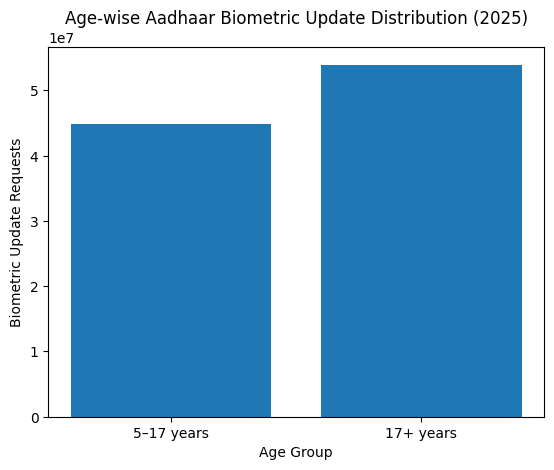

In [86]:
age_biometric = pd.DataFrame({
'Age Group': ['5–17 years', '17+ years'],
'Biometric Updates': [
df['bio_age_5_17'].sum(),
df['bio_age_17_'].sum()
]
})


plt.figure()
plt.bar(age_biometric['Age Group'], age_biometric['Biometric Updates'])
plt.xlabel("Age Group")
plt.ylabel("Biometric Update Requests")
plt.title("Age-wise Aadhaar Biometric Update Distribution (2025)")
plt.show()

Biometric update requests are significantly higher in the 17+ age group, indicating lifecycle-driven biometric degradation and authentication challenges among adult and elderly populations.

# State-wise Biometric Update Stress Analysis

In [87]:
state_biometric = (
df.groupby('state')['total_biometric_updates']
.sum()
.reset_index()
.sort_values(by='total_biometric_updates', ascending=False)
)


state_biometric.head(10)

,state,total_biometric_updates
20,Maharashtra,13420009
33,Uttar Pradesh,13032059
19,Madhya Pradesh,7975644
4,Bihar,6620169
30,Tamil Nadu,6581064
28,Rajasthan,5705345
1,Andhra Pradesh,5390520
10,Gujarat,4551913
35,West Bengal,3950780
15,Karnataka,3933666


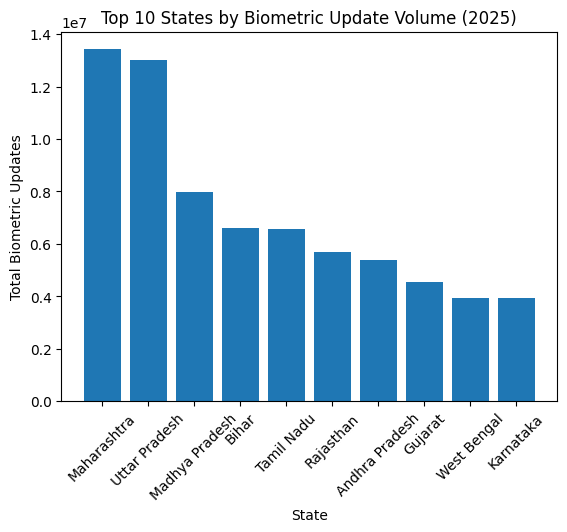

In [88]:
# Visualization: Top 10 states
plt.figure()
plt.bar(state_biometric.head(10)['state'], state_biometric.head(10)['total_biometric_updates'])
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total Biometric Updates")
plt.title("Top 10 States by Biometric Update Volume (2025)")
plt.show()

States with consistently high biometric update volumes indicate elevated authentication stress, requiring targeted infrastructure upgrades and improved device quality.

# Month-wise Biometric Update Trend (2025)

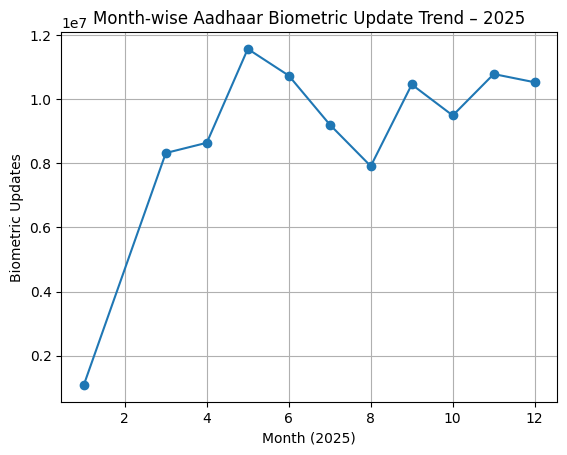

In [89]:
monthly_biometric = (
df.groupby('month')['total_biometric_updates']
.sum()
.reset_index()
.sort_values('month')
)


plt.figure()
plt.plot(monthly_biometric['month'], monthly_biometric['total_biometric_updates'], marker='o')
plt.xlabel("Month (2025)")
plt.ylabel("Biometric Updates")
plt.title("Month-wise Aadhaar Biometric Update Trend – 2025")
plt.grid(True)
plt.show()

Month-wise spikes in biometric update activity suggest campaign-driven refresh initiatives or operational cycles rather than uniform biometric degradation.

# District-level Biometric Update Disparities

In [90]:
district_biometric = (
df.groupby(['state', 'district'])['total_biometric_updates']
.sum()
.reset_index()
)


# Top and bottom districts
top_districts = district_biometric.sort_values('total_biometric_updates', ascending=False).head(10)
bottom_districts = district_biometric.sort_values('total_biometric_updates').head(10)


top_districts

,state,district,total_biometric_updates
497,Maharashtra,Pune,864853
493,Maharashtra,Nashik,829315
506,Maharashtra,Thane,829304
352,Karnataka,Bengaluru,694410
483,Maharashtra,Jalgaon,591556
217,Gujarat,Ahmedabad,591065
466,Maharashtra,Ahilyanagar,587121
487,Maharashtra,Mumbai,553531
662,Rajasthan,Jaipur,499440
468,Maharashtra,Amravati,495714


In [91]:
bottom_districts

,state,district,total_biometric_updates
259,Haryana,Hathin,1
878,West Bengal,Amta - Ii,1
136,Bihar,Prayagraj,1
560,Nagaland,Saitual,1
161,Chhattisgarh,Bijapur(Cgh),1
213,Goa,Dakshin Gangotri,1
572,Odisha,Balianta,1
294,Jammu and Kashmir,Baramulla,2
616,Punjab,Chandigarh,2
897,West Bengal,Naihati Anandabazar,2


Sharp disparities between high- and low-biometric-update districts indicate uneven access to biometric update infrastructure, particularly affecting rural and remote regions.

# Anomaly Detection

In [92]:
monthly_biometric.sort_values('total_biometric_updates')

,month,total_biometric_updates
0,1,1084430
6,8,7912376
1,3,8322222
2,4,8641679
5,7,9208946
8,10,9493286
7,9,10460436
10,12,10529574
4,6,10737521
9,11,10786667


Unusually high or low biometric update months suggest short-term operational factors such as targeted refresh drives, device maintenance cycles, or temporary service disruptions.